In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckplus/ck/CK+48/surprise/S071_001_00000012.png
/kaggle/input/ckplus/ck/CK+48/surprise/S082_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S116_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S097_001_00000020.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S127_001_00000015.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S107_001_00000008.png
/kaggle/input/ckplus/ck/CK+48/surprise/S138_004_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S126_004_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S090_002_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S100_002_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S063_001_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S052_001_00000014.png
/kaggle/input/ckplus/ck/

In [2]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split



from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure




2024-04-22 11:20:23.543560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 11:20:23.543706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 11:20:23.716923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset_folder= "/kaggle/input/ckplus/CK+48/"
N_CLASSES = 7


In [4]:
sub_folders=os.listdir(dataset_folder)
sub_folders

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

In [5]:
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case. 
  
  
  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)
  
  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
    images.append(hog_image)
    labels.append(label)
   
    
    i+=1
  last.append(i)

/kaggle/input/ckplus/CK+48//surprise/S071_001_00000012.png	0
/kaggle/input/ckplus/CK+48//surprise/S082_001_00000013.png	0
/kaggle/input/ckplus/CK+48//surprise/S116_001_00000013.png	0
/kaggle/input/ckplus/CK+48//surprise/S097_001_00000020.png	0
/kaggle/input/ckplus/CK+48//surprise/S085_003_00000013.png	0
/kaggle/input/ckplus/CK+48//surprise/S127_001_00000015.png	0
/kaggle/input/ckplus/CK+48//surprise/S085_003_00000011.png	0
/kaggle/input/ckplus/CK+48//surprise/S107_001_00000008.png	0
/kaggle/input/ckplus/CK+48//surprise/S138_004_00000013.png	0
/kaggle/input/ckplus/CK+48//surprise/S068_003_00000013.png	0
/kaggle/input/ckplus/CK+48//surprise/S126_004_00000010.png	0
/kaggle/input/ckplus/CK+48//surprise/S068_003_00000014.png	0
/kaggle/input/ckplus/CK+48//surprise/S090_002_00000010.png	0
/kaggle/input/ckplus/CK+48//surprise/S100_002_00000014.png	0
/kaggle/input/ckplus/CK+48//surprise/S063_001_00000011.png	0
/kaggle/input/ckplus/CK+48//surprise/S052_001_00000014.png	0
/kaggle/input/ckplus/CK+

In [6]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [7]:
images_x.shape

(981, 48, 48)

In [8]:
# encoding the labels
num_of_classes = 7
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [10]:
len(X_train)

735

In [11]:
len(X_test)

246

In [12]:
input = Input(shape = (48,48,1))
conv1 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

flatten = Flatten()(pool3)

dense_1 = Dense(128,activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)
dense_2 = Dense(64,activation='relu')(drop_1)
dense_3 = Dense(16,activation='relu')(dense_2)
dense_4 = Dense(7,activation='relu')(dense_3)



output = Dense(7,activation="sigmoid")(dense_4)

In [13]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           119 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,558,911 (5.95 MB)

 Trainable params: 1,558,911 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.1977 - loss: 2.1021 - val_accuracy: 0.1992 - val_loss: 1.9312
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.2402 - loss: 1.8738 - val_accuracy: 0.2602 - val_loss: 1.8766
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.2538 - loss: 1.8605 - val_accuracy: 0.3333 - val_loss: 1.7686
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.3393 - loss: 1.7375 - val_accuracy: 0.3333 - val_loss: 1.7110
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.3613 - loss: 1.7248 - val_accuracy: 0.4106 - val_loss: 1.5876
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.3921 - loss: 1.5867 - val_accuracy: 0.4309 - val_loss: 1.5056
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.4246 - loss: 1.4186 - val_accuracy: 0.4472 - val_loss: 1.4184
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.4510 - loss: 1.3737 - val_accura

In [15]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

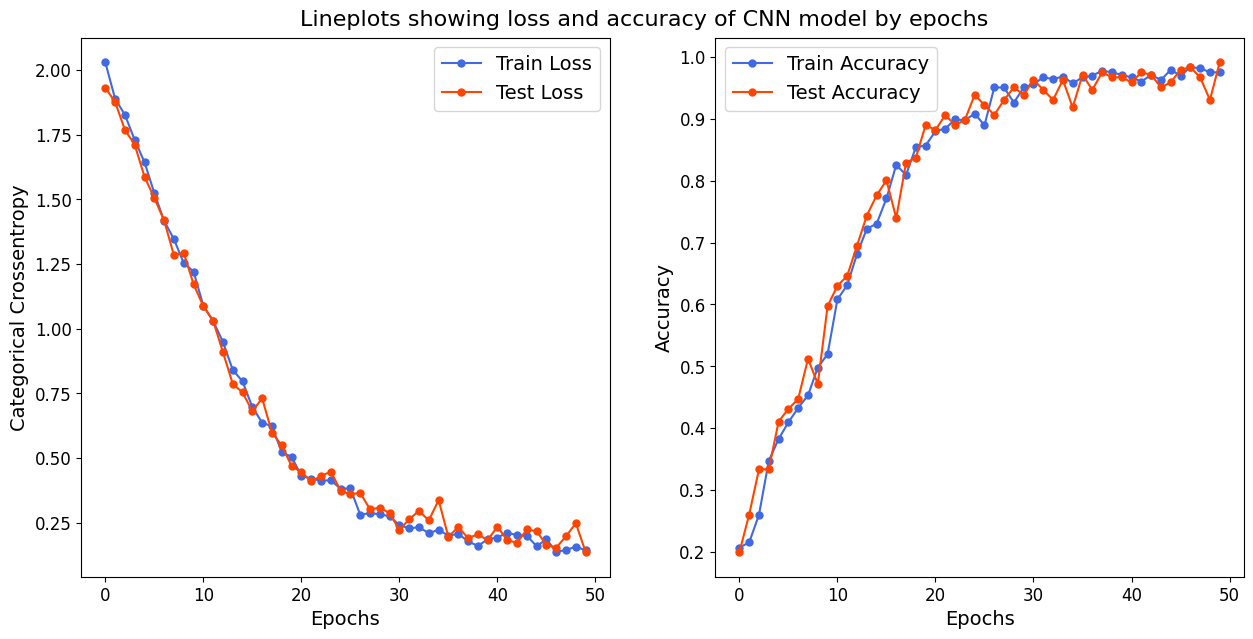

In [16]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)